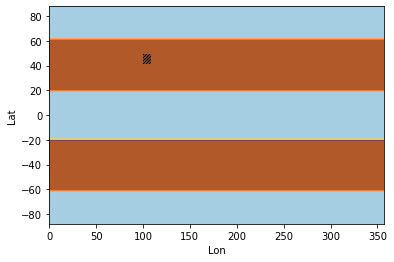

In [2]:
# %matplotlib notebook
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import os
os.chdir('/home/scratch/Abel_data') 

common=xr.open_zarr("common")
    
lon=common['longitude'].values[:]
lat=common['latitude'].values[:]
Area_type=common['area_type'].values[:]

plt.contourf(lon, lat, Area_type.astype(str)=='land', cmap='Paired')

with gzip.open('obs_mask10', 'rb') as f:
    mask= pickle.load(f)

lon_mask=np.arange(100,110,1)
lat_mask=np.arange(41,50,1)
    
plt.contourf(lon_mask, lat_mask, np.ones((9,10)), hatches=['////////'], alpha=0.2)

plt.ylabel('Lat')
plt.xlabel('Lon')
plt.savefig('/home/data/lab_abel/Paper1/land', bbox_inches='tight',dpi=900)

288.78336680853545 3.5097077958274774 -0.34823644572129014


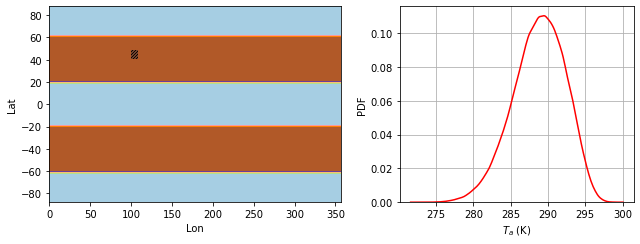

In [6]:
# %matplotlib notebook
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


# fig, axs = plt.subplots(1, 2, figsize=(9, 3.5))
fig, axs = plt.subplots(1, 2, figsize=(9, 3.5), gridspec_kw={'width_ratios': [1.25, 1]})
# Remove horizontal space between axes

import os
os.chdir('/home/scratch/Abel_data') 

common=xr.open_zarr("common")
    
lon=common['longitude'].values[:]
lat=common['latitude'].values[:]
Area_type=common['area_type'].values[:]

axs[0].contourf(lon, lat, Area_type.astype(str)=='land', cmap='Paired')

with gzip.open('obs_mask10', 'rb') as f:
    mask= pickle.load(f)

lon_mask=np.arange(100,110,1)
lat_mask=np.arange(41,50,1)
    
axs[0].contourf(lon_mask, lat_mask, np.ones((9,10)), hatches=['////////'], alpha=0.2)

axs[0].set(xlabel='Lon',ylabel='Lat')

############################################################################################################


import warnings
warnings.filterwarnings("ignore")
import scipy
import pickle
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics import tsaplots
import gzip
import seaborn

lat1=14
lat2=18
lon1=36
lon2=40

common=xr.open_zarr("/home/scratch/Abel_data/long_run2/common",consolidated=False)
lat=np.radians(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

st=0
temp_field=0
for i in range(1,51):
    for j in range(1,21):
        D=xr.open_zarr("/home/scratch/Abel_data/long_run2/run"+str(i)+"/year"+str(j),consolidated=False)
        if st==0:
            temp_field=D['air_temperature'][:,0].sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
            st=1
        elif st==1:
            temp_field = np.concatenate((temp_field, 
                                         D['air_temperature'][:,0].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))), axis=0)

T=(temp_field*np.cos(lat)).sum(axis=(1,2))/(np.cos(lat).sum())

import os
os.chdir('/home/scratch/Abel_data/long_run2')  

# with gzip.open('A_comb', 'rb') as f:
#     T=pickle.load(f)[:]

seaborn.distplot(ax=axs[1], a=T, kde=True, hist=False, label='long_run', color='red')
print(np.mean(T), np.std(T), scipy.stats.skew(T))

axs[1].set(xlabel='$T_{a}$ (K)',ylabel='PDF')
axs[1].grid()

plt.tight_layout()
plt.savefig('/home/data/lab_abel/Paper1_var1/land', bbox_inches='tight',dpi=900)